In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df=pd.read_csv('height-weight.csv')

In [3]:
df.head()

,Weight,Height
0,45,120
1,58,135
2,48,123
3,60,145
4,70,160


Text(0, 0.5, 'Height')

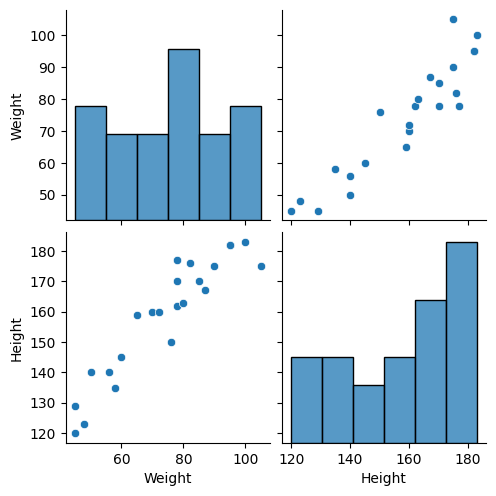

In [4]:
sns.pairplot(df[['Weight', 'Height']])
plt.xlabel('Weight')
plt.ylabel('Height')


Text(0, 0.5, 'Height')

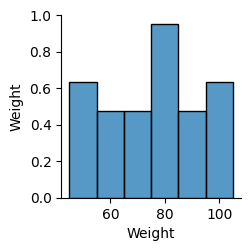

In [5]:
sns.pairplot(df[['Weight']])
plt.xlabel('Weight')
plt.ylabel('Height')

Text(0, 0.5, 'Height')

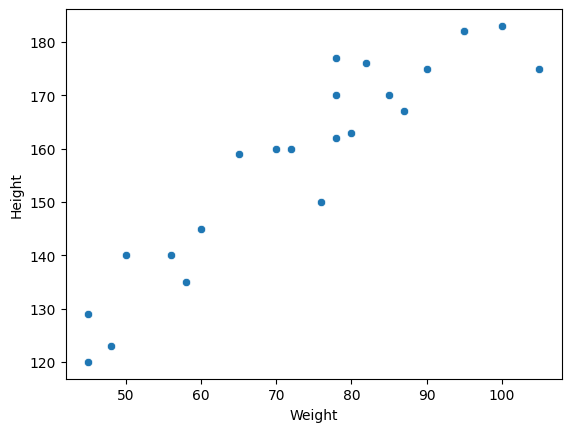

In [6]:
# plot through seaborn
sns.scatterplot(x='Weight', y='Height', data=df)
plt.xlabel('Weight')
plt.ylabel('Height')


Text(0, 0.5, 'Height')

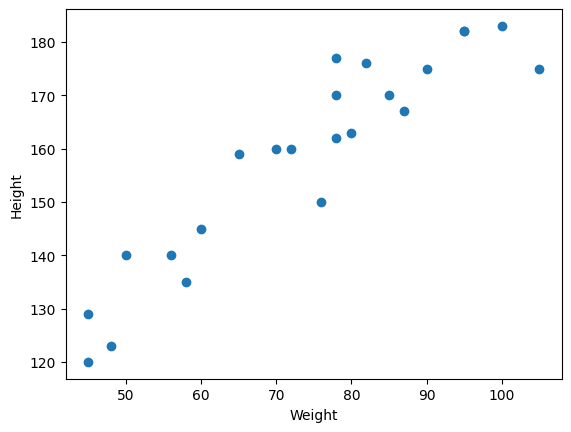

In [7]:
# sns.scatterplot(x='Weight', y='Height', data=df)
# through matplotlib
plt.scatter(df['Weight'], df['Height'])

plt.xlabel('Weight')
plt.ylabel('Height')

## What is coorelations ??

Correlation measures how strongly two variables are related to each other.
It tells you whether increases in one variable are associated with increases (or decreases) in another.
The most common measure is Pearson correlation coefficient (r), which ranges from -1 to +1.
Scale:

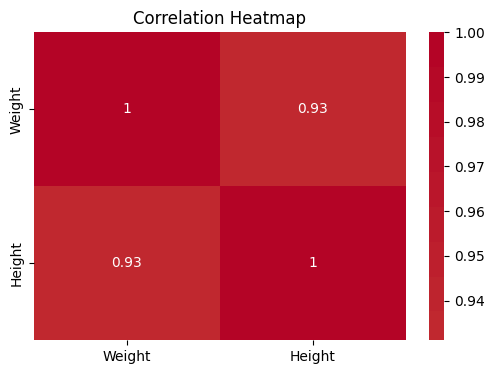

In [8]:
# Compute correlation matrix
corr_matrix = df.corr()

# Plot heatmap
plt.figure(figsize=(6,4))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", center=0)
plt.title("Correlation Heatmap")
plt.show()


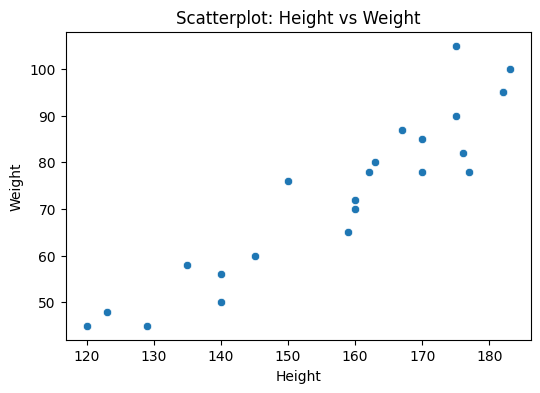

In [9]:
# Scatterplot of Height vs Weight
plt.figure(figsize=(6,4))
sns.scatterplot(x='Height', y='Weight', data=df)
plt.title("Scatterplot: Height vs Weight")
plt.show()

In [10]:
# Compute correlation matrix
df.corr()

,Weight,Height
Weight,1.000000,0.931142
Height,0.931142,1.000000


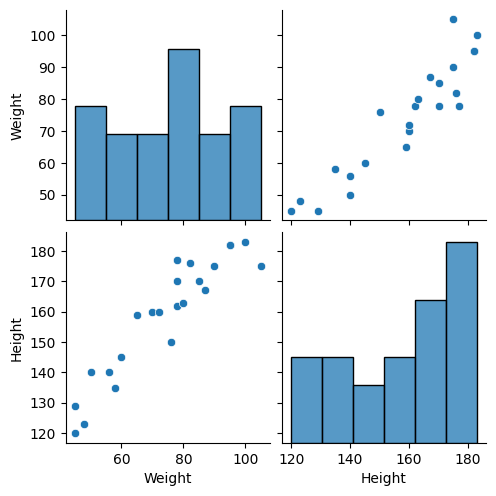

In [11]:
sns.pairplot(df[['Weight', 'Height']])

# Indepent Features 
## Independent features should be in data frame  or in 2D

In [12]:
## Independent Features 

X = df[['Weight']]
type(X)


pandas.core.frame.DataFrame

In [13]:
# dependent features

Y = df['Height'] # dependent variable in series or 1D form
type(Y)

pandas.core.series.Series

In [14]:

X


,Weight
0,45
1,58
2,48
3,60
4,70
5,78
6,80
7,90
8,95
9,78


In [15]:
Y

0     120
1     135
2     123
3     145
4     160
5     162
6     163
7     175
8     182
9     170
10    176
11    182
12    175
13    183
14    170
15    177
16    140
17    159
18    150
19    167
20    129
21    140
22    160
Name: Height, dtype: int64

In [16]:
# series
series = df['Weight']
type(series)

pandas.core.series.Series

In [17]:
series

0      45
1      58
2      48
3      60
4      70
5      78
6      80
7      90
8      95
9      78
10     82
11     95
12    105
13    100
14     85
15     78
16     50
17     65
18     76
19     87
20     45
21     56
22     72
Name: Weight, dtype: int64



# In the context of the Pandas library in Python for data analysis, Series and DataFrames are fundamental data structures:

## Series:
A Series is a one-dimensional labeled array capable of holding data of any type (integers, strings, Python objects, etc.).
It can be thought of as a single column or a single row of data, similar to a column in a spreadsheet or a SQL table.
Each element in a Series has an associated label, called an index, which allows for efficient data access and alignment.

## DataFrame:
A DataFrame is a two-dimensional labeled data structure with columns of potentially different types.
It is essentially a collection of Series objects, where each column of a DataFrame is a Series.
DataFrames are similar to tables in relational databases or spreadsheets, providing a structured way to store and manipulate tabular data with rows and columns.
They offer powerful functionalities for data manipulation, cleaning, analysis, and visualization.

In [18]:
## Train Test Split
from sklearn.model_selection import train_test_split


In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=42)

In [20]:
y_train.shape

(16,)

In [21]:
X_train.shape

(16, 1)

In [22]:
X_train

,Weight
13,100
5,78
2,48
11,95
20,45
3,60
4,70
18,76
16,50
21,56


In [23]:
## Standardization
from sklearn.preprocessing import StandardScaler

In [24]:
scaler=StandardScaler()
X_train=scaler.fit_transform(X_train)


In [25]:
X_train

array([[ 1.60377199],
       [ 0.2785895 ],
       [-1.52847753],
       [ 1.30259415],
       [-1.70918423],
       [-0.80565072],
       [-0.20329504],
       [ 0.15811836],
       [-1.40800639],
       [-1.04659299],
       [-0.08282391],
       [ 1.00141631],
       [ 0.51953177],
       [ 0.70023847],
       [ 0.82070961],
       [ 0.39906064]])

In [26]:
X_test=scaler.transform(X_test)

In [27]:
X_test

array([[ 0.2785895 ],
       [ 0.2785895 ],
       [-1.70918423],
       [ 1.30259415],
       [-0.50447288],
       [ 1.90494982],
       [-0.92612185]])

In [28]:
## Apply Simple Linear Regression
from sklearn.linear_model import LinearRegression


In [29]:
regression=LinearRegression()


In [30]:
regression.fit(X_train,y_train)

LinearRegression()

In [31]:
print("Coeffcient or slope:",regression.coef_)

Coeffcient or slope: [17.03207732]


In [32]:
print("Intercept:",regression.intercept_)

Intercept: 157.8125


Text(0, 0.5, 'Height')

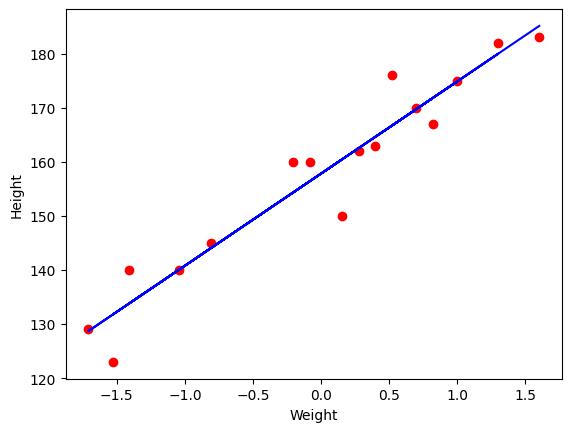

In [33]:
## plot Training data plot best fit line
plt.scatter(X_train,y_train,color='red')
plt.plot(X_train,regression.predict(X_train),color='blue')
plt.xlabel('Weight')
plt.ylabel('Height')

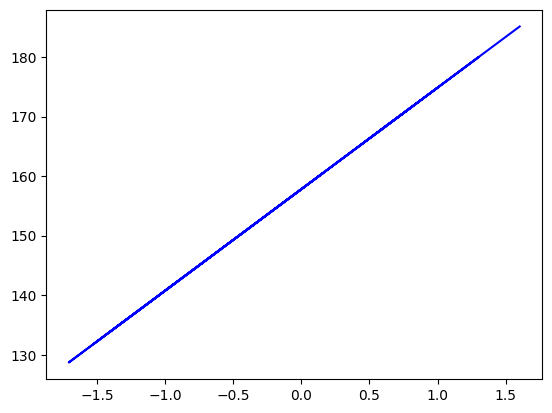

In [34]:
plt.plot(X_train,regression.predict(X_train),color='blue')

plt.show()

### prediction of test data
1. predicted height output= intercept +coef_(Weights)
2. y_pred_test =156.470 + 17.29(X_test)

In [35]:
## Prediction for test data
y_pred=regression.predict(X_test)

Text(0, 0.5, 'Height')

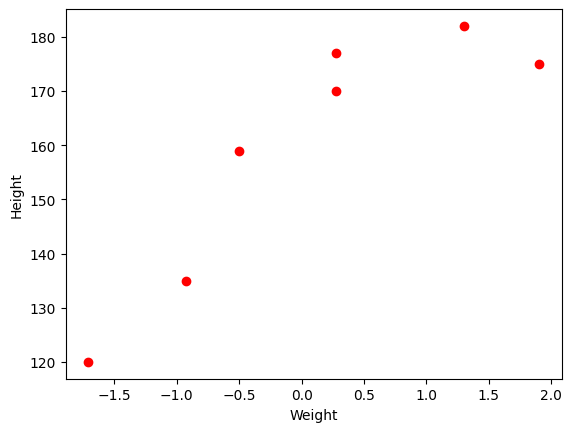

In [36]:
## plot Test data plot best fit line
plt.scatter(X_test,y_test,color='red')
# plt.plot(X_train,regression.predict(y_test),color='blue')
plt.xlabel('Weight')
plt.ylabel('Height')

In [37]:
y_pred

array([162.55745791, 162.55745791, 128.70154204, 179.99838426,
       149.22027893, 190.25775271, 142.03872102])

In [38]:
## Performance Metrics
from sklearn.metrics import mean_absolute_error,mean_squared_error

In [39]:
mse = mean_squared_error(y_test,y_pred)

In [40]:
mae = mean_absolute_error(y_test,y_pred)

In [41]:
rmse = np.sqrt(mse)
print(f'mse: "{mse}"')
print(f'mae: "{mae}"')
print(f'rmse: "{rmse}"')


mse: "103.09818711844574"
mae: "9.237776679921925"
rmse: "10.153727744944009"


## R square 
Formula

**R^2 = 1 - SSR/SST**


R^2	=	coefficient of determination
SSR	=	sum of squares of residuals
SST	=	total sum of squares

In [42]:
from sklearn.metrics import r2_score

In [43]:
score=r2_score(y_test,y_pred)
print(score)

0.7828485570493535


**Adjusted R2 = 1 – [(1-R2)*(n-1)/(n-k-1)]**

where:

R2: The R2 of the model
n: The number of observations
k: The number of predictor variables

In [44]:
#display adjusted R-squared
1 - (1-score)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)

0.7394182684592242

In [45]:
## OLS Linear Regression
import statsmodels.api as sm

In [46]:
model=sm.OLS(y_train,X_train).fit()

In [47]:
prediction=model.predict(X_test)
print(prediction)

[  4.74495791   4.74495791 -29.11095796  22.18588426  -8.59222107
  32.44525271 -15.77377898]


In [48]:
print(model.summary())

                                 OLS Regression Results                                
Dep. Variable:                 Height   R-squared (uncentered):                   0.012
Model:                            OLS   Adj. R-squared (uncentered):             -0.054
Method:                 Least Squares   F-statistic:                             0.1745
Date:                Sun, 28 Sep 2025   Prob (F-statistic):                       0.682
Time:                        08:21:11   Log-Likelihood:                         -103.69
No. Observations:                  16   AIC:                                      209.4
Df Residuals:                      15   BIC:                                      210.2
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

c:\Users\Hp\AppData\Local\Programs\Python\Python313\Lib\site-packages\scipy\stats\_axis_nan_policy.py:430: UserWarning: `kurtosistest` p-value may be inaccurate with fewer than 20 observations; only n=16 observations were given.
  return hypotest_fun_in(*args, **kwds)


In [52]:
## Prediction For new data
regression.predict(scaler.transform([[5]]))

c:\Users\Hp\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([87.66406826])